In [1]:
import pandas as pd
import numpy as np
import re
import string
import collections
import datetime 

data = pd.read_csv('/content/bbc-text.csv')
stopwords = pd.read_csv('/content/stopwords.txt', sep=" ", header=0).columns.values


def preprocess(line):
    line = line.lower()
    res = clean_punc_and_num(line)
    res = remove_words_less_than_2(res)
    res = remove_stopwords(res)
    return res

def clean_punc_and_num(line): 
    regex = re.compile('[^ a-zA-Z]')
    cleaned = regex.sub('', line)
    return  cleaned

def remove_words_less_than_2(line):
    regex = re.compile(r'\b\w{1,2}\b')
    cleaned = regex.sub('', line)
    return  cleaned

def remove_stopwords(line):
    words = line.split()
    return [w for w in words if w not in stopwords]
# set(regex.sub('', data.iloc[0,1]).split())
# set(clean_punc_and_num(data.iloc[0,1]).split())
# def preprocess(line):
# remove_words_less_than_2(clean_punc_and_num(data.iloc[1,1]))
d1 = datetime.datetime.now()
print('Preprocessing Starts at ', d1)
data['text'] = data['text'].map(lambda t : np.array(preprocess(t)))

# Count All Words in All Docs
word_counts = collections.Counter(np.concatenate(data.text))
print('Count All Words in All Docs is done')

# Cound Words in each Docs Seperately
count_term_in_docs = data.text.map(lambda t : collections.Counter(t))
print('Cound Words in each Docs Seperately is done')

# Count how many docs contain a word -- df_j
num_doc_have_term = pd.DataFrame(np.array([[0]] * len(word_counts.keys())).T, columns=list(word_counts.keys()))
def count(l):
    num_doc_have_term[l] += 1
data['text'].map(lambda l : count(l))
print('Count how many docs contain a word -- df_j is done')

# Initial V Matrix
v_matrix = np.zeros((data.shape[0], num_doc_have_term.shape[1]))

# Create term frequency matrix - frequency of word (j - column) in document (i - row) -- TF_ij
freq_term_in_doc = pd.DataFrame(v_matrix, columns=list(word_counts.keys()))    
for i in range(freq_term_in_doc.shape[0]):
    freq_term_in_doc.iloc[i][list(count_term_in_docs[i].keys())] = list(count_term_in_docs[i].values())    
print('Create term frequency matrix - frequency of word (j - column) in document (i - row) -- df_j ,  is done')
    
# Create V Matrix

N = data.shape[0] + 1
second_term = np.log(N / num_doc_have_term.values[0]) + 1
for i in range(v_matrix.shape[0]):
#     first_term =  np.log(1 + freq_term_in_doc.iloc[i])
    first_term =  freq_term_in_doc.iloc[i]
    v_matrix[i] = first_term * second_term

print('Create V Matrix is done')

d2 = datetime.datetime.now()
print('Total run time = ', (d2-d1).total_seconds() / 60, ' Minutes')


Preprocessing Starts at  2021-05-10 19:26:27.708075
Count All Words in All Docs is done
Cound Words in each Docs Seperately is done
Count how many docs contain a word -- df_j is done
Create term frequency matrix - frequency of word (j - column) in document (i - row) -- df_j ,  is done
Create V Matrix is done
Total run time =  4.2728377  Minutes


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random, time, sys, math
from som import SOM, plot_data_on_map
from mpl_toolkits.mplot3d import Axes3D

som1 = SOM()
som1.create(width=3, height=3, ch=v_matrix.shape[1])

# Fit the map to the dataset using total 20 optimization rounds.
som1.fit(v_matrix, random_sampling=0.5, n_iter=32, dist_method='cosine')


 Sum of distances = 988.27168
 Sum of distances = 973.39707
 Sum of distances = 962.06101
 Sum of distances = 945.31857
 Sum of distances = 938.42433
 Sum of distances = 929.61234
 Sum of distances = 916.89763
 Sum of distances = 910.59215
 Sum of distances = 902.63446
 Sum of distances = 889.91539
 Sum of distances = 880.03008
 Sum of distances = 884.01484
 Sum of distances = 878.27246
 Sum of distances = 870.80457
 Sum of distances = 865.42643
 Sum of distances = 863.97628
 Sum of distances = 863.26868
 Sum of distances = 859.24907
 Sum of distances = 861.02469
 Sum of distances = 859.18342
 Sum of distances = 855.69180
 Sum of distances = 857.49329
 Sum of distances = 855.98263
 Sum of distances = 851.72408
 Sum of distances = 854.94592
 Sum of distances = 855.59254
 Sum of distances = 851.03195
 Sum of distances = 852.80230
 Sum of distances = 854.63959
 Sum of distances = 850.85976
 Sum of distances = 849.27131
 Sum of distances = 850.36116

Training done in 264.825394 seconds.


Finding mathing nodes [=====================>] Done


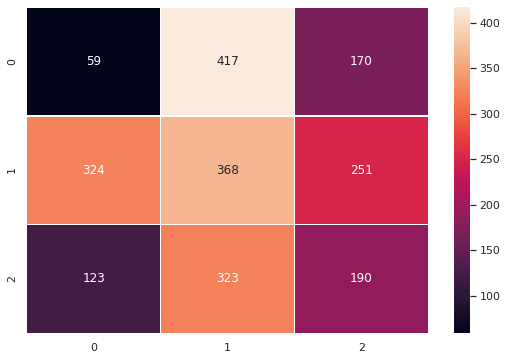

In [26]:
cm = np.zeros((3,3),dtype='int')
pred = som1.find_maching_nodes(v_matrix)[0]
for p in pred:
  cm[p[0], p[1]] += 1

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)

In [27]:

som2 = SOM()
som2.create(width=4, height=4, ch=v_matrix.shape[1])

# Fit the map to the dataset using total 20 optimization rounds.
som2.fit(v_matrix, random_sampling=0.5, n_iter=50, dist_method='cosine')


 Sum of distances = 984.32312
 Sum of distances = 969.19334
 Sum of distances = 953.39207
 Sum of distances = 935.56238
 Sum of distances = 921.76984
 Sum of distances = 906.78235
 Sum of distances = 893.65649
 Sum of distances = 882.35361
 Sum of distances = 875.22923
 Sum of distances = 864.52579
 Sum of distances = 850.65857
 Sum of distances = 846.47110
 Sum of distances = 837.51287
 Sum of distances = 841.22915
 Sum of distances = 832.35788
 Sum of distances = 831.97662
 Sum of distances = 831.98875
 Sum of distances = 823.96389
 Sum of distances = 820.70462
 Sum of distances = 824.33616
 Sum of distances = 821.66801
 Sum of distances = 823.98773
 Sum of distances = 819.93778
 Sum of distances = 818.72375
 Sum of distances = 816.41943
 Sum of distances = 816.88371
 Sum of distances = 819.02535
 Sum of distances = 815.78326
 Sum of distances = 822.22234
 Sum of distances = 815.90497
 Sum of distances = 816.84950
 Sum of distances = 817.87749
 Sum of distances = 816.08695
 Sum of di

Finding mathing nodes [=====================>] Done


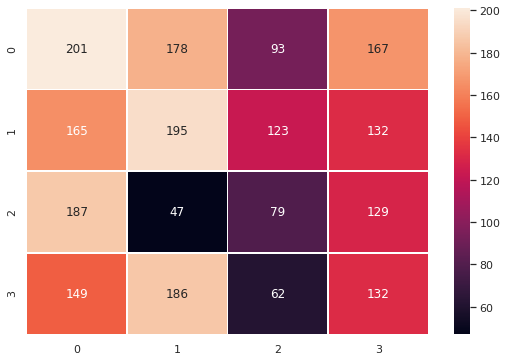

In [29]:
cm = np.zeros((4,4),dtype='int')
pred = som2.find_maching_nodes(v_matrix)[0]
for p in pred:
  cm[p[0], p[1]] += 1

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)

In [30]:

som3 = SOM()
som3.create(width=5, height=5, ch=v_matrix.shape[1])

# Fit the map to the dataset using total 20 optimization rounds.
som3.fit(v_matrix, random_sampling=0.5, n_iter=50, dist_method='cosine')

 Sum of distances = 967.99443
 Sum of distances = 947.29613
 Sum of distances = 934.39595
 Sum of distances = 917.91156
 Sum of distances = 901.88465
 Sum of distances = 878.02448
 Sum of distances = 869.22316
 Sum of distances = 861.00289
 Sum of distances = 844.92531
 Sum of distances = 831.93541
 Sum of distances = 823.53642
 Sum of distances = 822.50907
 Sum of distances = 809.70958
 Sum of distances = 802.44542
 Sum of distances = 805.33665
 Sum of distances = 796.53705
 Sum of distances = 794.73923
 Sum of distances = 788.46562
 Sum of distances = 790.28309
 Sum of distances = 795.21176
 Sum of distances = 789.27486
 Sum of distances = 785.83394
 Sum of distances = 791.93603
 Sum of distances = 790.68122
 Sum of distances = 791.44050
 Sum of distances = 787.93990
 Sum of distances = 784.37744
 Sum of distances = 792.85439
 Sum of distances = 785.17577
 Sum of distances = 783.43155
 Sum of distances = 786.82954
 Sum of distances = 788.22598
 Sum of distances = 785.23675
 Sum of di

Finding mathing nodes [=====================>] Done


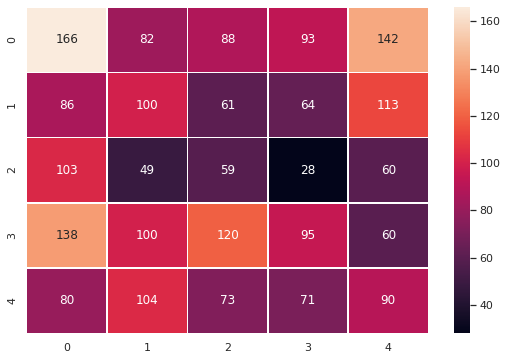

In [31]:
cm = np.zeros((5,5),dtype='int')
pred = som3.find_maching_nodes(v_matrix)[0]
for p in pred:
  cm[p[0], p[1]] += 1

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)